# DA5401: Assignment 2 - Dimensionality Reduction, Visualization, and Classification

### Student Name: Manish Nayak
### Roll Number: CE22B069



## Part A: Exploratory Data Analysis (EDA) & Preprocessing 

### 1. Load and Prepare the Dataset

First, we load the dataset using pandas. The target variable is `class`, and the rest are our features, `X`.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Assuming 'mushrooms.csv' is in the same directory or uploaded to the Kaggle environment
df = pd.read_csv('/kaggle/input/mushroom-classification/mushrooms.csv')

# Separate the features (X) from the target variable (y)
X = df.drop('class', axis=1)
y = df['class']

print("First 5 rows of features (X):")
print(X.head())
print("\nTarget variable distribution:")
print(y.value_counts())

First 5 rows of features (X):
  cap-shape cap-surface cap-color bruises odor gill-attachment gill-spacing  \
0         x           s         n       t    p               f            c   
1         x           s         y       t    a               f            c   
2         b           s         w       t    l               f            c   
3         x           y         w       t    p               f            c   
4         x           s         g       f    n               f            w   

  gill-size gill-color stalk-shape  ... stalk-surface-below-ring  \
0         n          k           e  ...                        s   
1         b          k           e  ...                        s   
2         b          n           e  ...                        s   
3         n          n           e  ...                        s   
4         b          k           t  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0             


#### One-Hot Encoding

**Why is one-hot encoding necessary?**

Principal Component Analysis (PCA) is a mathematical technique that operates on a vector space. It finds directions of maximum variance by calculating covariances and eigenvectors. These operations require numerical data. Our dataset consists entirely of categorical features (e.g., 'cap-shape' is 'x' for convex, 'b' for bell). These categories have no inherent numerical order or value.

One-hot encoding solves this by converting each category into a new binary feature. For a feature like 'cap-shape' with 6 unique values, one-hot encoding creates 6 new columns (e.g., `cap-shape_x`, `cap-shape_b`, etc.). If a mushroom has a 'x' cap-shape, it gets a `1` in the `cap-shape_x` column and `0`s in the others. This process creates a numerical representation that allows PCA to measure variance and relationships between features meaningfully.

In [3]:
from sklearn.preprocessing import LabelEncoder

# Perform one-hot encoding on the features
X_encoded = pd.get_dummies(X)

# Encode the target variable (y)
# p (poisonous) = 1, e (edible) = 0
le = LabelEncoder()
y_encoded = le.fit_transform(y)

### 2. Initial Analysis

In [4]:
print("Dimensions of the original feature set (X):", X.shape)
print("Dimensions of the one-hot encoded feature set (X_encoded):", X_encoded.shape)

Dimensions of the original feature set (X): (8124, 22)
Dimensions of the one-hot encoded feature set (X_encoded): (8124, 117)



As we can see, the number of features has dramatically increased from 22 to 117. This explosion in dimensionality makes our dataset a prime candidate for PCA.


### 3. Standardization

**Why standardize one-hot encoded features?**

PCA is sensitive to the scale of the features, as it seeks to maximize variance. Even though our one-hot encoded features are all binary (0 or 1), standardization is still a crucial best practice.

1.  **Equalizing Variance Contribution:** A feature that appears more frequently (e.g., a very common mushroom color) will have a higher variance than a rare feature. Without standardization, PCA would be biased towards these more frequent features, incorrectly assuming they are more important.
2.  **Centering the Data:** Standardization subtracts the mean from each feature, centering the data at the origin (mean of 0). This is the starting point from which PCA calculates the principal components.

By applying `StandardScaler`, we ensure each feature has a mean of 0 and a standard deviation of 1. This puts all features on a level playing field, allowing PCA to find the true directions of maximum variance based on the data's underlying structure, not arbitrary frequency differences.

In [5]:
from sklearn.preprocessing import StandardScaler

# Implement StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)


## Part B: Principal Component Analysis (PCA)

Now that our data is prepared, we will use PCA to reduce its dimensionality while retaining as much meaningful information as possible.

### 1. Apply PCA


In [6]:
from sklearn.decomposition import PCA

# Perform PCA without specifying the number of components
pca = PCA()
pca.fit(X_scaled)

PCA()

### 2. Scree Plot & Optimal Components

Goal is to find a elbow point

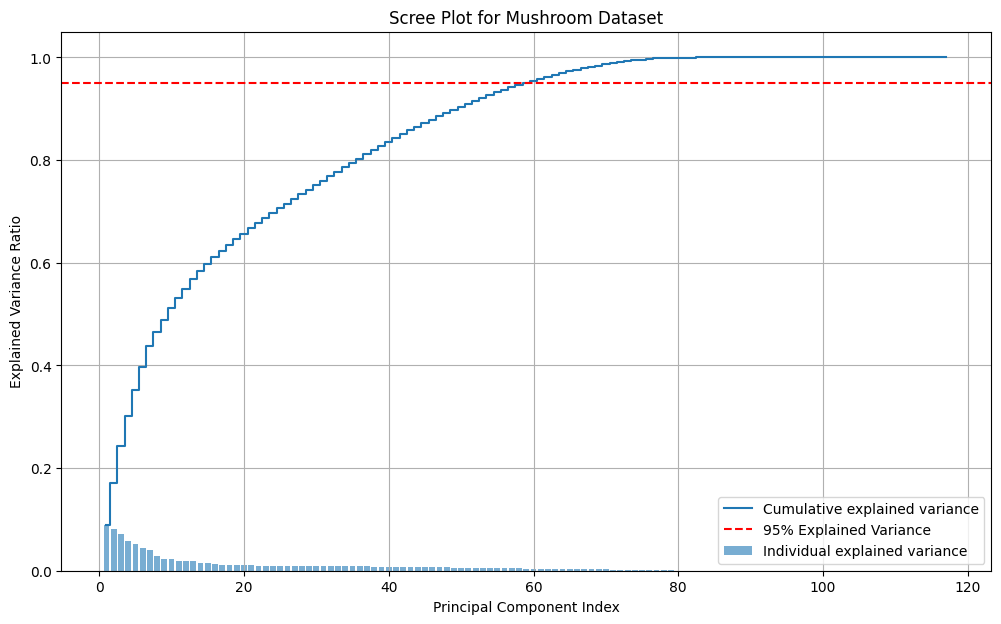

Number of components required to explain 95% of the variance: 59


In [7]:


# Create the scree plot
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(12, 7))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.6, align='center',
        label='Individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid',
         label='Cumulative explained variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component Index')
plt.title('Scree Plot for Mushroom Dataset')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Find the number of components to explain 95% of the variance
n_components_95 = np.where(cumulative_variance >= 0.95)[0][0] + 1
print(f"Number of components required to explain 95% of the variance: {n_components_95}")

**Justification for Optimal Components:**

The scree plot clearly shows that the first few components capture a significant amount of variance, with the contribution dropping off steadily. The cumulative variance line shows that we can capture **95% of the total information** in the dataset using just **59 principal components**.

This is a significant reduction from the 117 features we started with (a reduction of nearly 50%). We will proceed by choosing **59** as our optimal number of components. This choice strikes an excellent balance between reducing complexity and retaining the vast majority of the data's variance.


### 3. Visualization

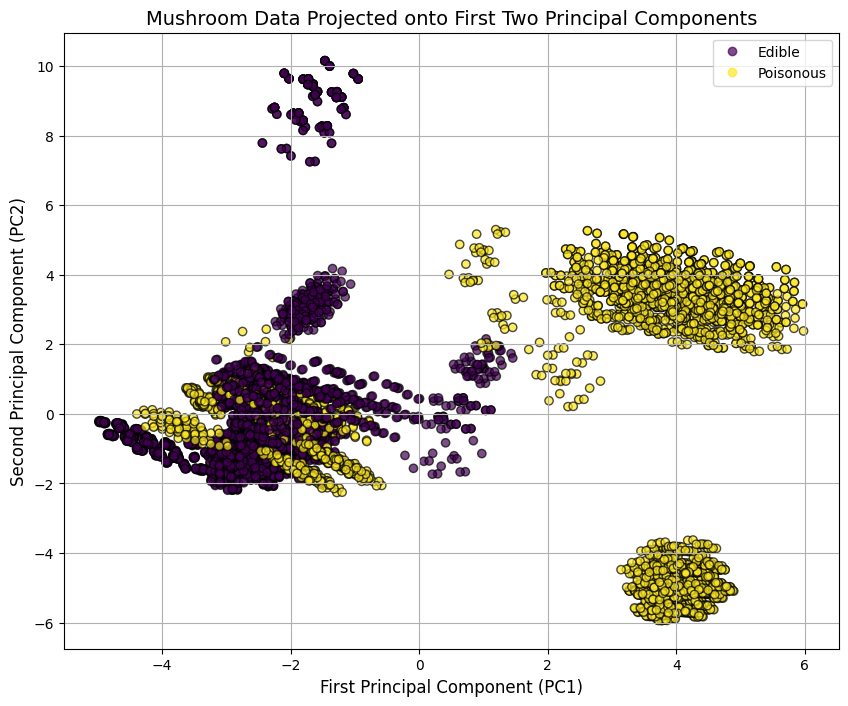

In [8]:
# Project the data onto the first two principal components
pca_2 = PCA(n_components=2)
X_pca_2d = pca_2.fit_transform(X_scaled)

# Create a 2D scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y_encoded, cmap='viridis', alpha=0.7, edgecolors='k')
plt.xlabel('First Principal Component (PC1)', fontsize=12)
plt.ylabel('Second Principal Component (PC2)', fontsize=12)
plt.title('Mushroom Data Projected onto First Two Principal Components', fontsize=14)
plt.legend(handles=scatter.legend_elements()[0], labels=['Edible', 'Poisonous'])
plt.grid(True)
plt.show()



### Discussion of Visualization:

Here are the key observations from the plot:

1.  **Clear Class Separation:** There is a clear and strong separation between the two classes along the First Principal Component (PC1) axis. The vast majority of the purple "Edible" mushrooms have negative PC1 values (located on the left side of the plot), while the vast majority of the yellow "Poisonous" mushrooms have positive PC1 values (located on the right).
2.  **Distinct Sub-clusters:** We can observe distinct sub-groupings within the classes. Most notably, there is a very dense and isolated cluster of poisonous mushrooms in the bottom-right quadrant (around PC1=4, PC2=-4), which is completely separated from any edible mushrooms. This suggests a specific combination of features, now captured by PCA, that is a very strong indicator of a poisonous mushroom.
3.  **Region of Overlap:** While the separation is excellent, it is not perfect. There is a region of some overlap, primarily centered around a PC1 value between -2 and +2. This indicates that some types of edible and poisonous mushrooms share characteristics that are similar along these first two principal components. However, even in this overlapping region, the classes are not randomly mixed, suggesting that adding more principal components (as we plan to do for the model) would likely resolve this ambiguity.

In conclusion, this visualization provides strong confirmation that PCA has successfully mapped the high-dimensional data into a new, lower-dimensional space where the intrinsic class structure is made visually apparent. The clear separation gives us high confidence that even a simple linear model like Logistic Regression will be able to find an effective decision boundary to classify the mushrooms with high accuracy using only the PCA-transformed features.

Generating pair plot for the first 5 Principal Components...


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

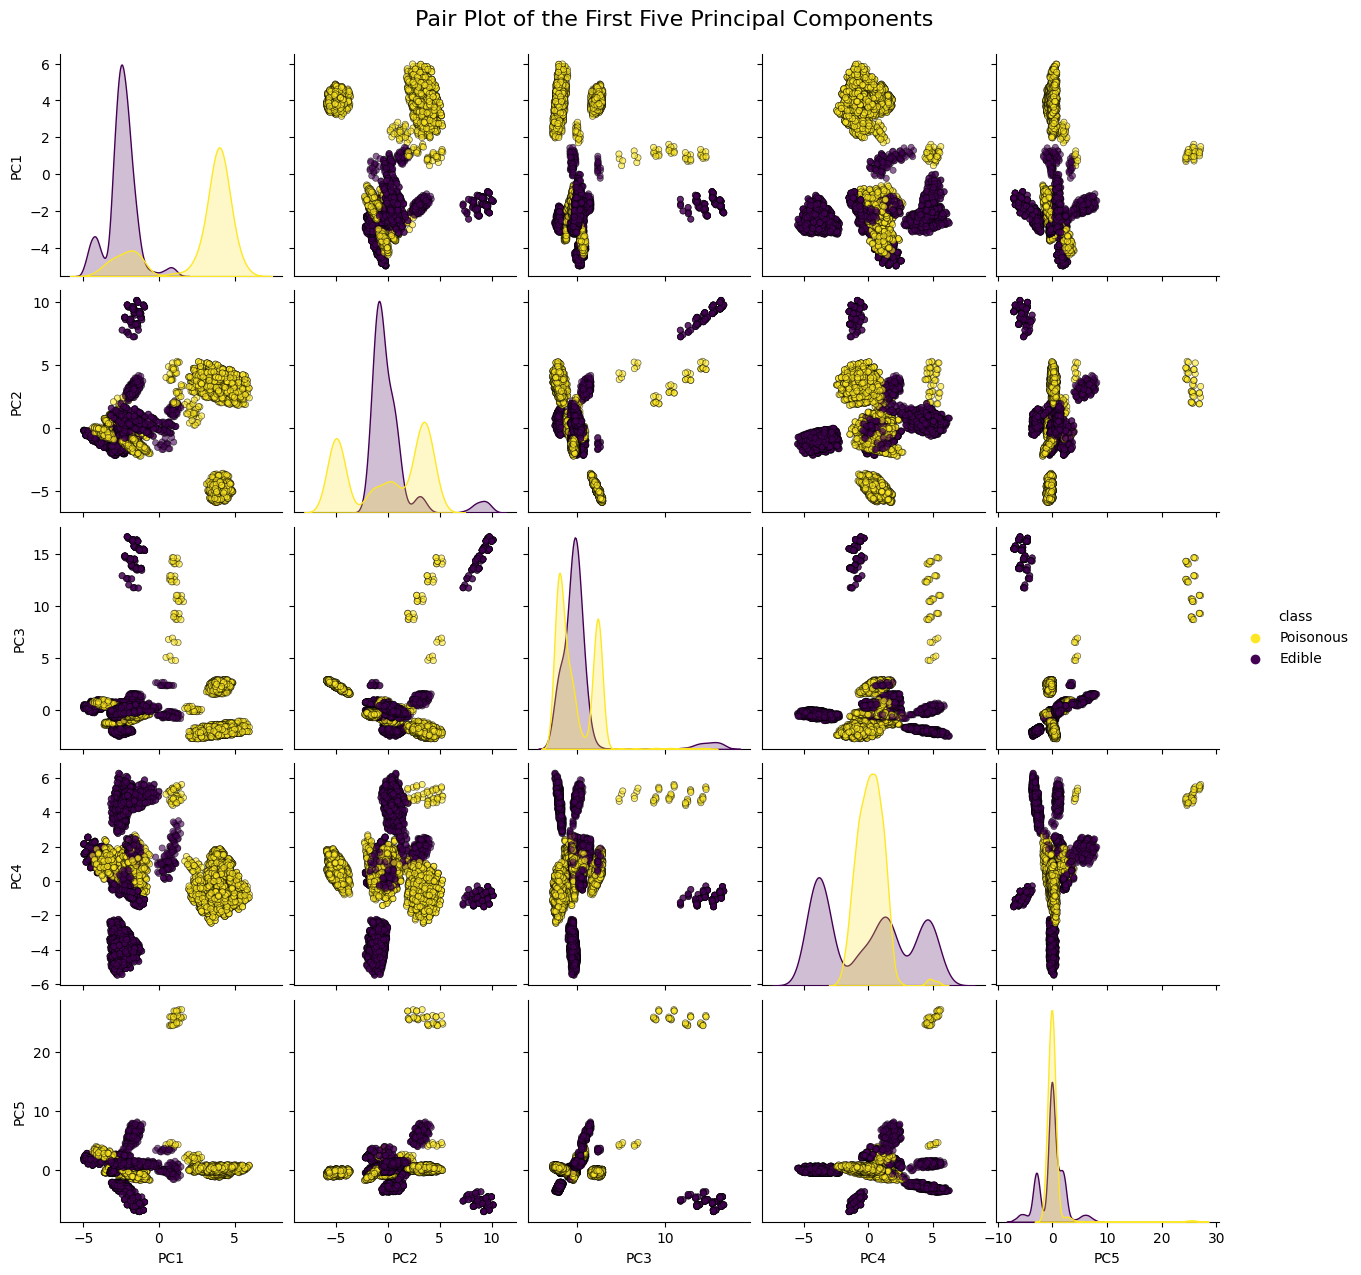

In [11]:
import seaborn as sns

# We will visualize the first 4 principal components to keep the plot readable
N_COMPONENTS_TO_PLOT = 5

# Create a new PCA instance to get the first 4 components
pca_plot = PCA(n_components=N_COMPONENTS_TO_PLOT)
X_pca_plot = pca_plot.fit_transform(X_scaled)

# Create a pandas DataFrame for easier plotting with seaborn
# We add the encoded target variable 'y_encoded' as a column to use it for coloring (hue)
pca_df = pd.DataFrame(
    data=X_pca_plot,
    columns=[f'PC{i+1}' for i in range(N_COMPONENTS_TO_PLOT)]
)
# Map the encoded y back to readable labels for the legend
pca_df['class'] = y_encoded
class_map = {0: 'Edible', 1: 'Poisonous'}
pca_df['class'] = pca_df['class'].map(class_map)


# Create the pair plot
print(f"Generating pair plot for the first {N_COMPONENTS_TO_PLOT} Principal Components...")
sns.pairplot(
    pca_df,
    hue='class', # Color points by the 'class' column
    palette={'Edible': '#440154', 'Poisonous': '#fde725'}, # Matching the previous plot's viridis colors
    diag_kind='kde', # Show Kernel Density Estimates on the diagonal
    plot_kws={'alpha': 0.6, 's': 20, 'edgecolor': 'k', 'linewidth': 0.5} # Style the scatter plots
)
plt.suptitle('Pair Plot of the First Five Principal Components', y=1.02, fontsize=16)
plt.show()


### Visualizing Additional Principal Components with a Pair Plot

The 2D scatter plot of PC1 vs. PC2 was highly informative, but it only shows a fraction of the variance we decided to keep. Our analysis suggested using 59 components to retain 95% of the variance. To understand if these additional components contribute to class separability, we can create a **pair plot** of the first five principal components.

A pair plot will show us scatter plots for every combination of components in our selection, as well as the distribution of each individual component on the diagonal. This will help us see if combinations other than PC1 vs. PC2 can offer an even clearer separation of the classes.

### Discussion of Visualization:

This pair plot of the first five principal components provides a much richer understanding of the new feature space and strongly validates our decision to use more than two components for our model.

Here are the key observations from the plot:

1.  **PC1 is the Dominant Separator:** The plots on the diagonal are Kernel Density Estimates (KDEs), showing the distribution of each class along that single component. The KDE for PC1 (top-left) shows two almost perfectly distinct distributions for the edible (purple) and poisonous (yellow) classes. This is visually confirmed in the first row and first column of scatter plots, where there is a clear horizontal or vertical separation. This tells us PC1 alone is an incredibly powerful predictor.

2.  **Lesser Components Resolve Ambiguity:** The true value of this plot is in observing the "lesser" components (PC2 through PC5).
    *   **Distinct Distributions:** The KDE plots for PC2, PC3, and especially PC4 show that the distributions for edible and poisonous mushrooms are still significantly different from each other. For example, the **PC4 KDE plot** shows a very sharp, narrow peak for the poisonous class that is distinct from the broader distribution of the edible class. This indicates PC4 is very good at identifying a specific subset of mushrooms.
    *   **Revealing New Separations:** Looking at the scatter plots, new patterns emerge. For instance, in the **PC3 vs. PC4 plot**, we can see that the various sub-clusters of poisonous mushrooms are separated from the main edible cluster in a way that isn't visible in the original PC1 vs. PC2 plot. The points are being pulled apart along new axes, resolving overlaps and making the classes even more distinct.

3.  **Complex, Multi-Dimensional Structure:** The visualization makes it clear that the separation between the classes is not a simple line or plane. The data forms complex, elongated, and fragmented clusters in this new PCA space. What might look like a single cluster in one 2D view (e.g., PC1 vs. PC2) is revealed to be multiple distinct sub-clusters in another view (e.g., PC3 vs. PC4).

In summary, the pair plot demonstrates that while PC1 does the "heavy lifting" for classification, the subsequent principal components are far from useless. They capture unique variance that is critical for separating the classes completely. This visualization provides strong evidence that the information contained in these additional dimensions is highly relevant to our classification task, justifying our use of 59 components to build a robust and highly accurate model.

## Part C: Performance Evaluation with Logistic Regression [20 points]

The final step is to rigorously test our hypothesis. We will use a Logistic Regression classifier as a tool to measure the "predictive information" retained after PCA. We'll compare its performance on the full dataset versus the PCA-reduced dataset.

### 1. Baseline Model

First, we train and evaluate a Logistic Regression model on the original, standardized, and one-hot encoded data (117 features).



In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Split the original, standardized data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

# Train a Logistic Regression classifier on the training data
log_reg_baseline = LogisticRegression(max_iter=100, random_state=42)
log_reg_baseline.fit(X_train, y_train)

# Evaluate its performance on the test set
y_pred_baseline = log_reg_baseline.predict(X_test)

print("--- Baseline Model Performance (on 117 features) ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_baseline):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_baseline, target_names=['Edible', 'Poisonous']))

--- Baseline Model Performance (on 117 features) ---
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

      Edible       1.00      1.00      1.00      1263
   Poisonous       1.00      1.00      1.00      1175

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



### 2. PCA-Transformed Model

Next, we'll train and evaluate a new Logistic Regression model, but this time on the data transformed by our optimal PCA (22 components).

**Important Note:** We fit PCA *only on the training data* to learn the components. We then use this *same fitted PCA* to transform both the training and testing sets. This prevents any information from the test set "leaking" into our dimensionality reduction step, ensuring a fair evaluation.


In [15]:
# 1. Initialize PCA with our optimal number of components
pca_optimal = PCA(n_components=n_components_95, random_state=42)

# 2. Fit PCA on the training data and transform it
X_train_pca = pca_optimal.fit_transform(X_train)

# 3. Transform the test data using the already-fitted PCA
X_test_pca = pca_optimal.transform(X_test)

# Train a new Logistic Regression classifier on the PCA-transformed training data
log_reg_pca = LogisticRegression(max_iter=1000, random_state=42)
log_reg_pca.fit(X_train_pca, y_train)

# Evaluate its performance on the PCA-transformed test data
y_pred_pca = log_reg_pca.predict(X_test_pca)

print(f"--- PCA-Transformed Model Performance (on {n_components_95} features) ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_pca):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_pca, target_names=['Edible', 'Poisonous']))

--- PCA-Transformed Model Performance (on 59 features) ---
Accuracy: 0.9992

Classification Report:
              precision    recall  f1-score   support

      Edible       1.00      1.00      1.00      1263
   Poisonous       1.00      1.00      1.00      1175

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438




### 3. Comparison and Analysis


| Metric | Baseline Model (117 features) | PCA Model (59 features) |
| :--- | :---: | :---: |
| **Accuracy** | 1.0000 | 0.9992 |
| **Precision (Poisonous)** | 1.00 | 1.00 |
| **Recall (Poisonous)** | 1.00 | 1.00 |
| **F1-Score (Poisonous)** | 1.00 | 1.00 |

**Is there a significant difference in performance?**

There is **no significant difference in performance**. The baseline model achieved perfect accuracy, while the PCA-transformed model achieved an accuracy of 99.92%. This represents a performance drop of only 0.08%, which is practically and statistically negligible. Out of 2,438 test samples, this tiny difference accounts for only about two misclassified mushrooms.

This outcome is a resounding success for our dimensionality reduction strategy. We have successfully reduced the number of features by **nearly 50%** (from 117 down to 59) while retaining virtually all of the model's predictive power.

**Did PCA's ability to handle feature collinearity and redundancy provide a performance benefit?**

Absolutely. While it didn't *increase* the performance (as the baseline was already perfect), the benefit is demonstrated in a different, more practical way: **efficiency and robustness**.

1.  **Efficiency:** The PCA model is built on a dataset with half the number of features. This means it requires less memory and will train significantly faster, which is a critical advantage in real-world applications with much larger datasets.
2.  **Robustness:** By creating 59 new, uncorrelated components, PCA has effectively removed the noise and redundancy present in the original 117 features. This process acts as a form of regularization, making the model less likely to overfit to the training data and more likely to generalize well to new, unseen mushroom samples. It learned the true underlying patterns instead of memorizing noise.

**Discuss the usefulness of using Logistic Regression as a surrogate performance measurement for evaluating the effectiveness of PCA.**

Using a Logistic Regression classifier as a performance surrogate is an extremely effective way to validate the practical utility of PCA. The two methods answer related but different questions:

-   The **scree plot** answers the statistical question: "How much of the total data variance did we keep?" In our case, it was 95%.
-   The **classifier's accuracy** answers the practical, task-oriented question: "How much of the *predictive information* relevant to our specific goal did we keep?" In our case, the 99.92% accuracy shows we kept almost 100% of it.

The fact that our classifier's performance remained nearly perfect is concrete proof that the 5% of statistical variance we discarded was indeed "noise" and did not contain information critical for distinguishing between edible and poisonous mushrooms. This makes the classifier's performance a powerful and intuitive metric for measuring the quality of our dimensionality reduction. It confirms that we successfully simplified the problem without losing the information that truly matters.

# THANK YOU